<a href="https://colab.research.google.com/github/shanjida101/Study-Machine-Learning-/blob/main/Handalling_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handalling missing value**

1.Dropping the column

 2.Imputing
  
    i)Univariate (Focusing in one column at a time)
        Example:Filling it with MEAN,MEDIAN,MODE
    ii)Multivariate (analyze two or more variables together)
           Example:Iterative Imputer(MICE), KNN, or ML-based imputation
  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CCA(Completing case analysis)
Data is missing completely random, which is mostly like Dropping. Randomly removing data, only used when the distribution is not getting effected.Easy to implement.
As the distribution in most cases gets effected easily so not that much used.

In [3]:

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
house_df=pd.DataFrame(housing.data, columns=housing.feature_names)
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
house_df.shape

(20640, 8)

In [7]:
house_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [8]:
house_df.isnull().mean()*100

,0
MedInc,0.0
HouseAge,0.0
AveRooms,0.0
AveBedrms,0.0
Population,0.0
AveOccup,0.0
Latitude,0.0
Longitude,0.0


There is no missing data. CCA only should be applied when the total of missing data is less than 5%


*Loading dataset with missing value*

In [9]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().mean()*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


Only embark_town and embarked can be dropped. We can also check the distribution of categorical data and by this we can understand missing value impacts as well as noisy or rare category. But mostly distribution checked on numerical data.


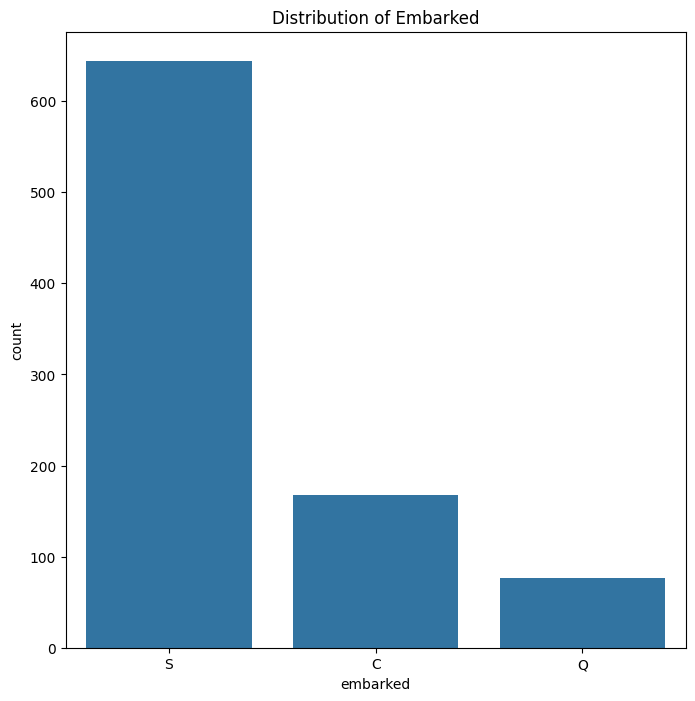

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
# Use countplot for categorical data
sns.countplot(data=df, x='embarked', ax=ax) # Specify the column name and axes
plt.title('Distribution of Embarked') # Add a title for clarity
plt.show()

In [11]:
#checking the missing value
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['embarked', 'embark_town']

In [12]:
df[cols].sample(5)

,embarked,embark_town
846,S,Southampton
352,C,Cherbourg
264,Q,Queenstown
725,S,Southampton
229,S,Southampton


Checking after dropping will anything change in the dataset. As we can see the change is very less.

Checking the category

In [14]:
df["embarked"].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [15]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [16]:
#new_df = df.dropna(subset=['embarked', 'embark_town'])
new_df = df[cols].dropna()

In [17]:
df.shape , new_df.shape

((891, 15), (889, 2))

In [36]:
# Calculate proportions for original
original = pd.concat([df["embark_town"].value_counts()/len(df)], axis=1)

# Calculate proportions for CCA data
cca= pd.concat([new_df["embark_town"].value_counts()/len(new_df)], axis=1)

# Concatenate the proportions for comparison
temp = pd.concat([original, cca], axis=1, keys=["original", "cca"])

# Print the resulting comparison DataFrame
print(temp)

             original       cca
                count     count
embark_town                    
Southampton  0.722783  0.724409
Cherbourg    0.188552  0.188976
Queenstown   0.086420  0.086614


If CCA is used in neumerical data then we should perform histogram plot and then compare with before after, if there is no changes then the CCA was correctly performed.

For Categorical Variable we should Use Bar Plots (Count Plots).As we can see its categorical we are going to use bar plots

<Figure size 800x400 with 0 Axes>

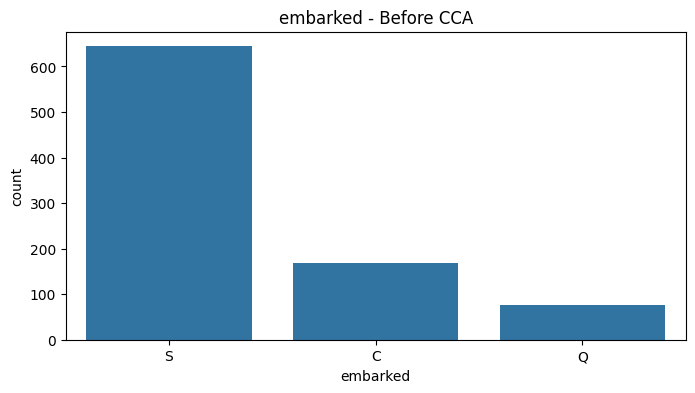

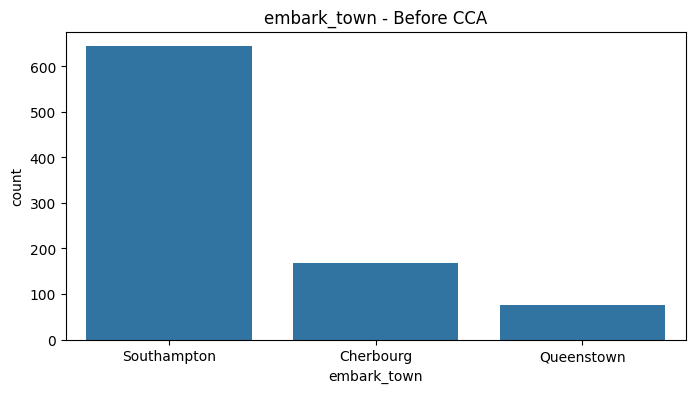

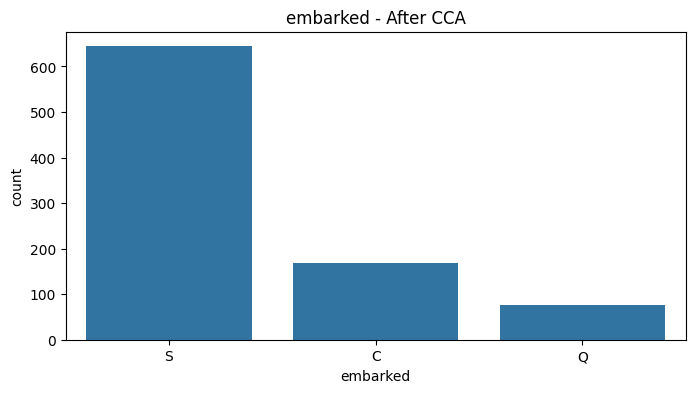

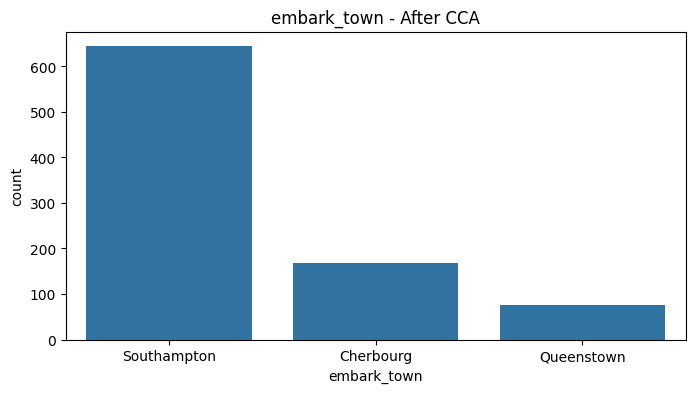

In [23]:
# Before CCA
plt.figure(figsize=(8, 4))
# Iterate through the list of columns and create a countplot for each
for col in cols:
    plt.figure(figsize=(8, 4)) # Create a new figure for each plot
    sns.countplot(data=df, x=col) # Pass a single column name to x
    plt.title(f'{col} - Before CCA')
    plt.show()
#After CCA
for col in cols:
 plt.figure(figsize=(8, 4))
 sns.countplot(data=new_df, x=col)
 plt.title(f'{col} - After CCA')
 plt.show()

*In numerical dataset performing CCA*

In [50]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [51]:
#check for missing value

df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [57]:
#checking the column where missing value is
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['horsepower']

Missing value in horsepower

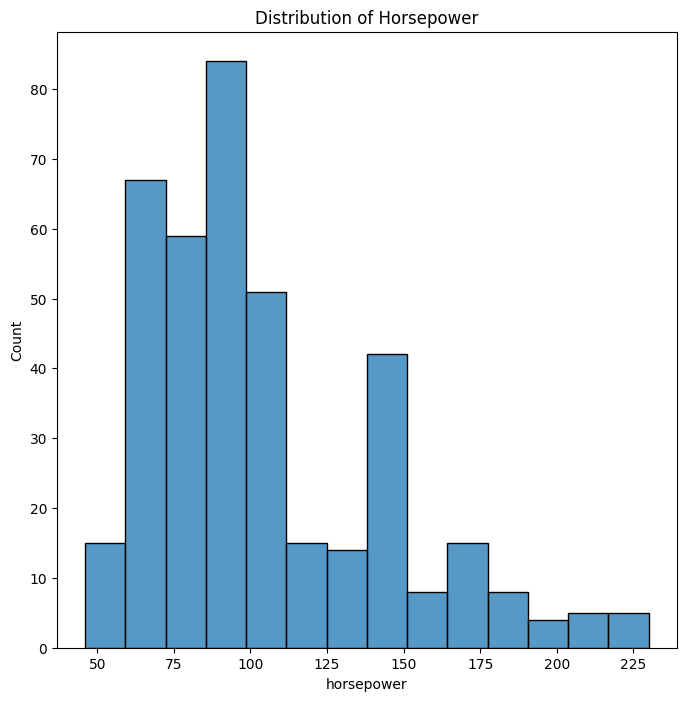

In [65]:
#check for distibution of data in horsepower
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=df, x='horsepower', ax=ax) # Use sns.histplot and specify the column and axes
plt.title('Distribution of Horsepower') # Add a title for clarity
plt.show()

In [61]:
new_df= df[cols].dropna()
df.shape , new_df.shape

((398, 9), (392, 1))

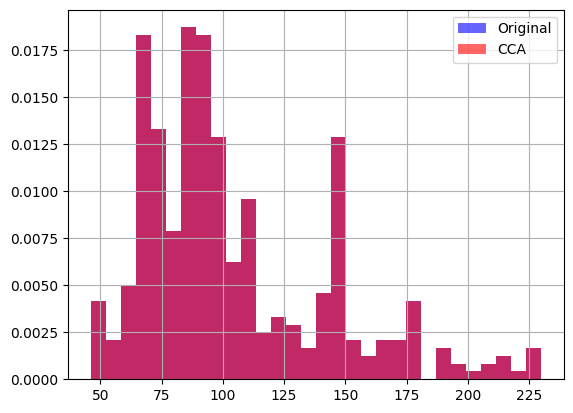

In [66]:
fi = plt.figure()
ax= fi.add_subplot(111)
df["horsepower"].hist(bins=30, ax=ax, density=True, alpha=0.6, color='b')
new_df["horsepower"].hist(bins=30, ax=ax, density=True, alpha=0.6, color='r')
ax.legend(['Original', 'CCA'])

From this we can say its comparable and doing cca won't effect the dataset that much